**Increased the count of Neurons in the layers**

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
batch_size = 200
num_classes = 10
epochs = 100

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
model.add(Dense(640, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(640, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 640)               1966720   
_________________________________________________________________
dropout_1 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 640)               410240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                6410      
Total params: 2,383,370
Trainable params: 2,383,370
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [0]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 16s 323us/step - loss: 0.0887 - acc: 0.1647 - val_loss: 0.0850 - val_acc: 0.2627
Epoch 2/100
50000/50000 [==============================] - 16s 330us/step - loss: 0.0850 - acc: 0.2445 - val_loss: 0.0824 - val_acc: 0.3074
Epoch 3/100
50000/50000 [==============================] - 17s 336us/step - loss: 0.0828 - acc: 0.2832 - val_loss: 0.0806 - val_acc: 0.3269
Epoch 4/100
50000/50000 [==============================] - 17s 336us/step - loss: 0.0815 - acc: 0.3055 - val_loss: 0.0794 - val_acc: 0.3463
Epoch 5/100
50000/50000 [==============================] - 16s 328us/step - loss: 0.0804 - acc: 0.3229 - val_loss: 0.0784 - val_acc: 0.3548
Epoch 6/100
50000/50000 [==============================] - 16s 327us/step - loss: 0.0795 - acc: 0.3332 - val_loss: 0.0776 - val_acc: 0.3687
Epoch 7/100
50000/50000 [==============================] - 17s 330us/step - loss: 0.0787 - acc: 0.3430 - val_l

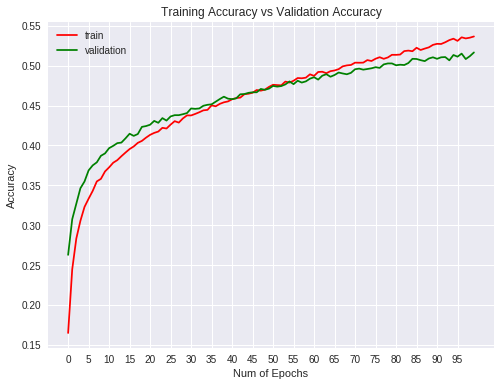

In [0]:
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 100, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
plt.show()

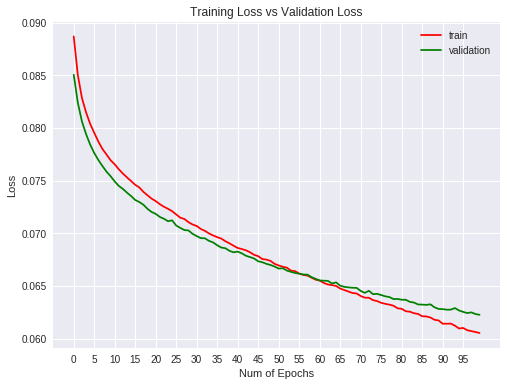

In [0]:
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 100, 5.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
plt.show()

**Conclusion:**
Increased neurons and Epochs increases the accuracy. 
No much changes in loss. Computation time increased by 3 secs per Epoch